<a href="https://colab.research.google.com/github/namoshi/mathAI/blob/master/pca_face_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Reconstruction by PCA


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition


In [ ]:
n_row, n_col = 2, 3
n_disp = n_row * n_col
n_components = 150
image_shape = (64, 64)
n_pixels = 64*64
rng = np.random.RandomState(0)

データ（Olivetti Face Images）の読み込み

データは，400枚の顔画像（64x64画素）

In [ ]:
# #############################################################################
# Load faces data
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True,
                                random_state=rng)
n_samples, n_features = faces.shape

print(faces.shape)

print(faces.mean(axis=0))

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
#faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

#print(faces_centered.shape)
print("Dataset consists of %d faces" % n_samples)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/kurita/scikit_learn_data
(400, 4096)
[0.40013418 0.4342354  0.47628093 ... 0.3214153  0.3136467  0.31045458]
Dataset consists of 400 faces


In [ ]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

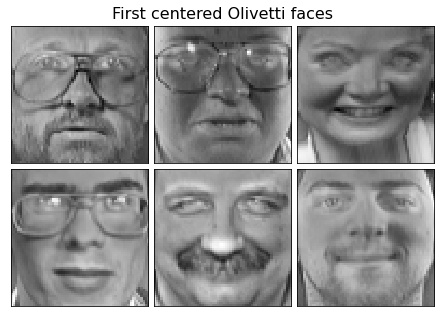

In [ ]:
# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_disp])


主成分分析の実行

In [ ]:
pca = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
data = faces_centered
pca.fit(data)

PCA(n_components=150, svd_solver='randomized', whiten=True)

第1主成分から第6主成分に対応する固有ベクトルの表示

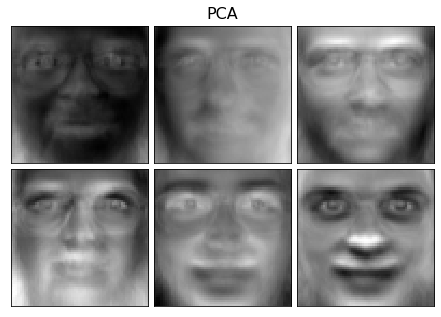

In [ ]:
plot_gallery('PCA', pca.components_[:n_disp])
plt.savefig("eigen_faces.png")
plt.show()

主成分スコア（150次元）からの元の画像の再構成（逆変換）

93


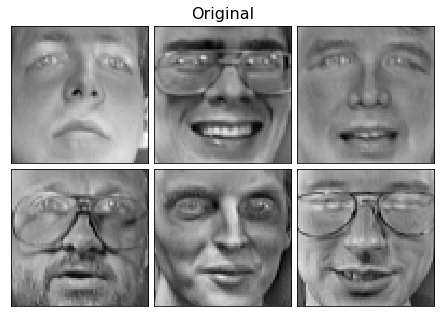

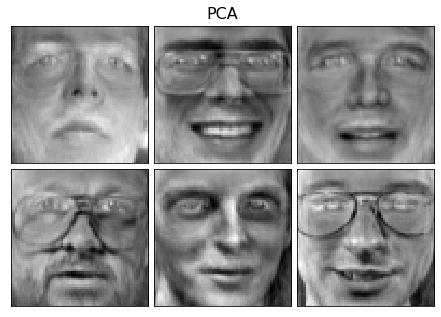

In [ ]:
# inversr transform
y = pca.transform(data)
estimg = pca.inverse_transform(y)

rnd = int(np.random.rand()*(n_samples - n_disp))
print(rnd)

plot_gallery('Original', data[rnd:rnd+n_disp])
plot_gallery('PCA', estimg[rnd:rnd+n_disp])

ランダムな矩形で部分的な隠れを加えた画像からの元の画像の再構成

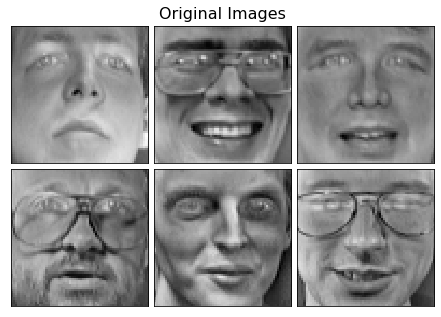

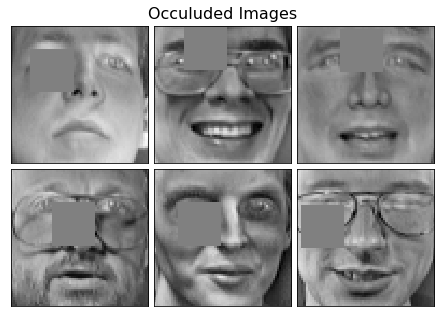

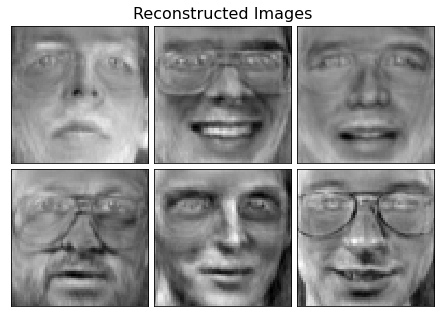

In [ ]:
# Mozic Input

m_h, m_w = 20, 20
#print(m_h, m_w)

org_images = data[rnd:rnd+n_disp]
plot_gallery('Original Images', org_images)
plt.savefig("original_faces.png")
plt.show()

occuluded_images = np.copy(org_images)

for i in range(n_disp):
    m_rnd_x = int(np.random.rand()*(64-m_w))
    m_rnd_y = int(np.random.rand()*(64-m_h))
#    print(m_rnd_x, m_rnd_y)
    image = occuluded_images[i].reshape(image_shape)
#    print(image.shape)
#    plt.imshow(image.reshape(image_shape), cmap = "gray")
    for x in range(m_w):
        for y in range(m_h):
            image[m_rnd_x+x, m_rnd_y+y] = 0.0
    occuluded_images[i] = image.reshape(n_pixels)


plot_gallery('Occuluded Images', occuluded_images)
plt.savefig("occuluded_faces.png")
plt.show()

# Reconstruction by PCA
y = pca.transform(occuluded_images)
estimg = pca.inverse_transform(y)

plot_gallery('Reconstructed Images', estimg)

plt.savefig("reconstructed_faces.png")
plt.show()